### 读取附件1，附件2

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 获取当前脚本所在目录的绝对路径
current_path = os.getcwd()

# 构建附件1.xlsx和附件4.xlsx的相对路径
path_file1 = os.path.join(current_path, '附件1.xlsx')
path_file2 = os.path.join(current_path,'附件2.xlsx')

# 打印路径以进行调试
print(path_file1)
print(path_file2)
# 读取附件1.xlsx
df1 = pd.read_excel(path_file1)
# 读取附件2.xlsx
df2 = pd.read_excel(path_file2)

# 打印数据框的前几行，查看数据
print(df1.head())
print(df2.head())

df_merge = pd.merge(df1,df2,on='单品编码',how='inner')
df_merge['总销售额']=df_merge['销量(千克)']*df_merge['销售单价(元/千克)']

df_result1 = df_merge.groupby('单品编码').agg({'销量(千克)':'sum','总销售额':'sum'}).reset_index()
df_result2 = df_merge.groupby('分类编码').agg({'销量(千克)':'sum','总销售额':'sum'}).reset_index()

print(df_result1.to_string())
print(df_result2.to_string())


c:\Users\hxq11\Desktop\mathematical-modeling\实战1\真题模拟\2023国赛C\附件1.xlsx
c:\Users\hxq11\Desktop\mathematical-modeling\实战1\真题模拟\2023国赛C\附件2.xlsx
              单品编码    单品名称        分类编码 分类名称
0  102900005115168    牛首生菜  1011010101  花叶类
1  102900005115199   四川红香椿  1011010101  花叶类
2  102900005115625  本地小毛白菜  1011010101  花叶类
3  102900005115748     白菜苔  1011010101  花叶类
4  102900005115762      苋菜  1011010101  花叶类
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否
                单品编码     销量(千克)         总销售额
0    102900005115168    899.837    3506.0886
1    102900005115199    333.223   10547.7653
2  

### 绘制品类销量分布图

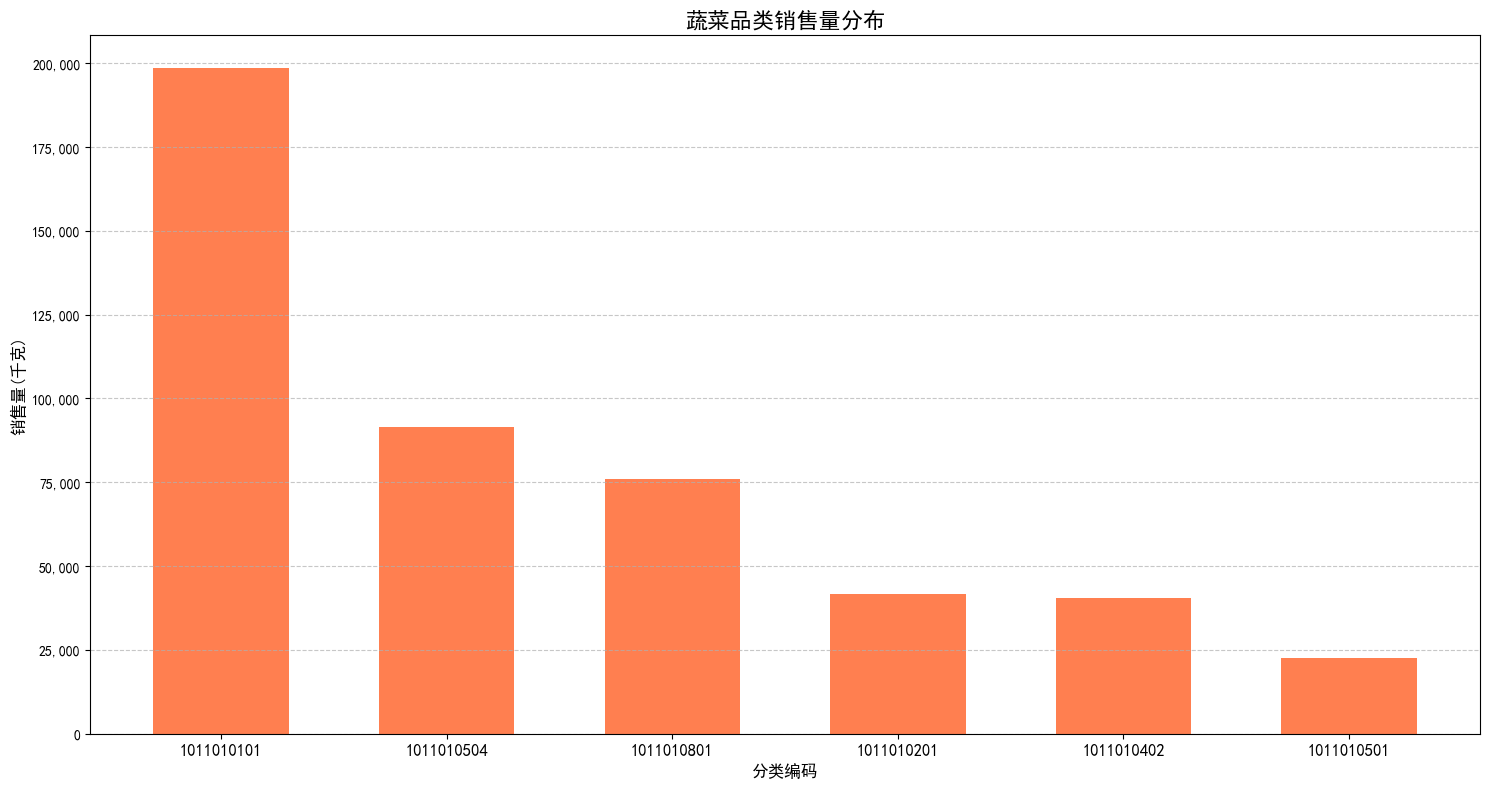

In [3]:
#########################################  品类销售量分布 ##################################################
# 按销售量降序排序
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

df_result2_sorted = df_result2.sort_values('销量(千克)', ascending=False)

# 计算累计销售量占比
df_result2_sorted['累计销售量占比'] = df_result2_sorted['销量(千克)'].cumsum() / df_result2_sorted['销量(千克)'].sum()
df_result2

def format_func(value, tick_number):
    return f'{value:,.0f}'

# 绘制品类销售量分布图
plt.figure(figsize=(15, 8))  # 保持图表大小

# 创建均匀间隔的 x 轴
x = np.arange(len(df_result2_sorted))

# 使用新的 x 轴绘制柱状图
plt.bar(x, df_result2_sorted['销量(千克)'], 
        alpha=1, color='coral', width=0.6)  # 使用相对宽度

plt.title('蔬菜品类销售量分布', fontsize=16)
plt.xlabel('分类编码', fontsize=12)
plt.ylabel('销售量(千克)', fontsize=12)

# 设置 x 轴刻度和标签
plt.xticks(x, df_result2_sorted['分类编码'], rotation=0, ha='center', fontsize=12)

# 应用格式化到 y 轴
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 如果 x 轴标签太多，可以考虑只显示部分
if len(df_result2_sorted) > 20:
    plt.xticks(x[::2], df_result2_sorted['分类编码'][::2], rotation=45, ha='center')

plt.tight_layout()
plt.show()

### 单品销售额分布

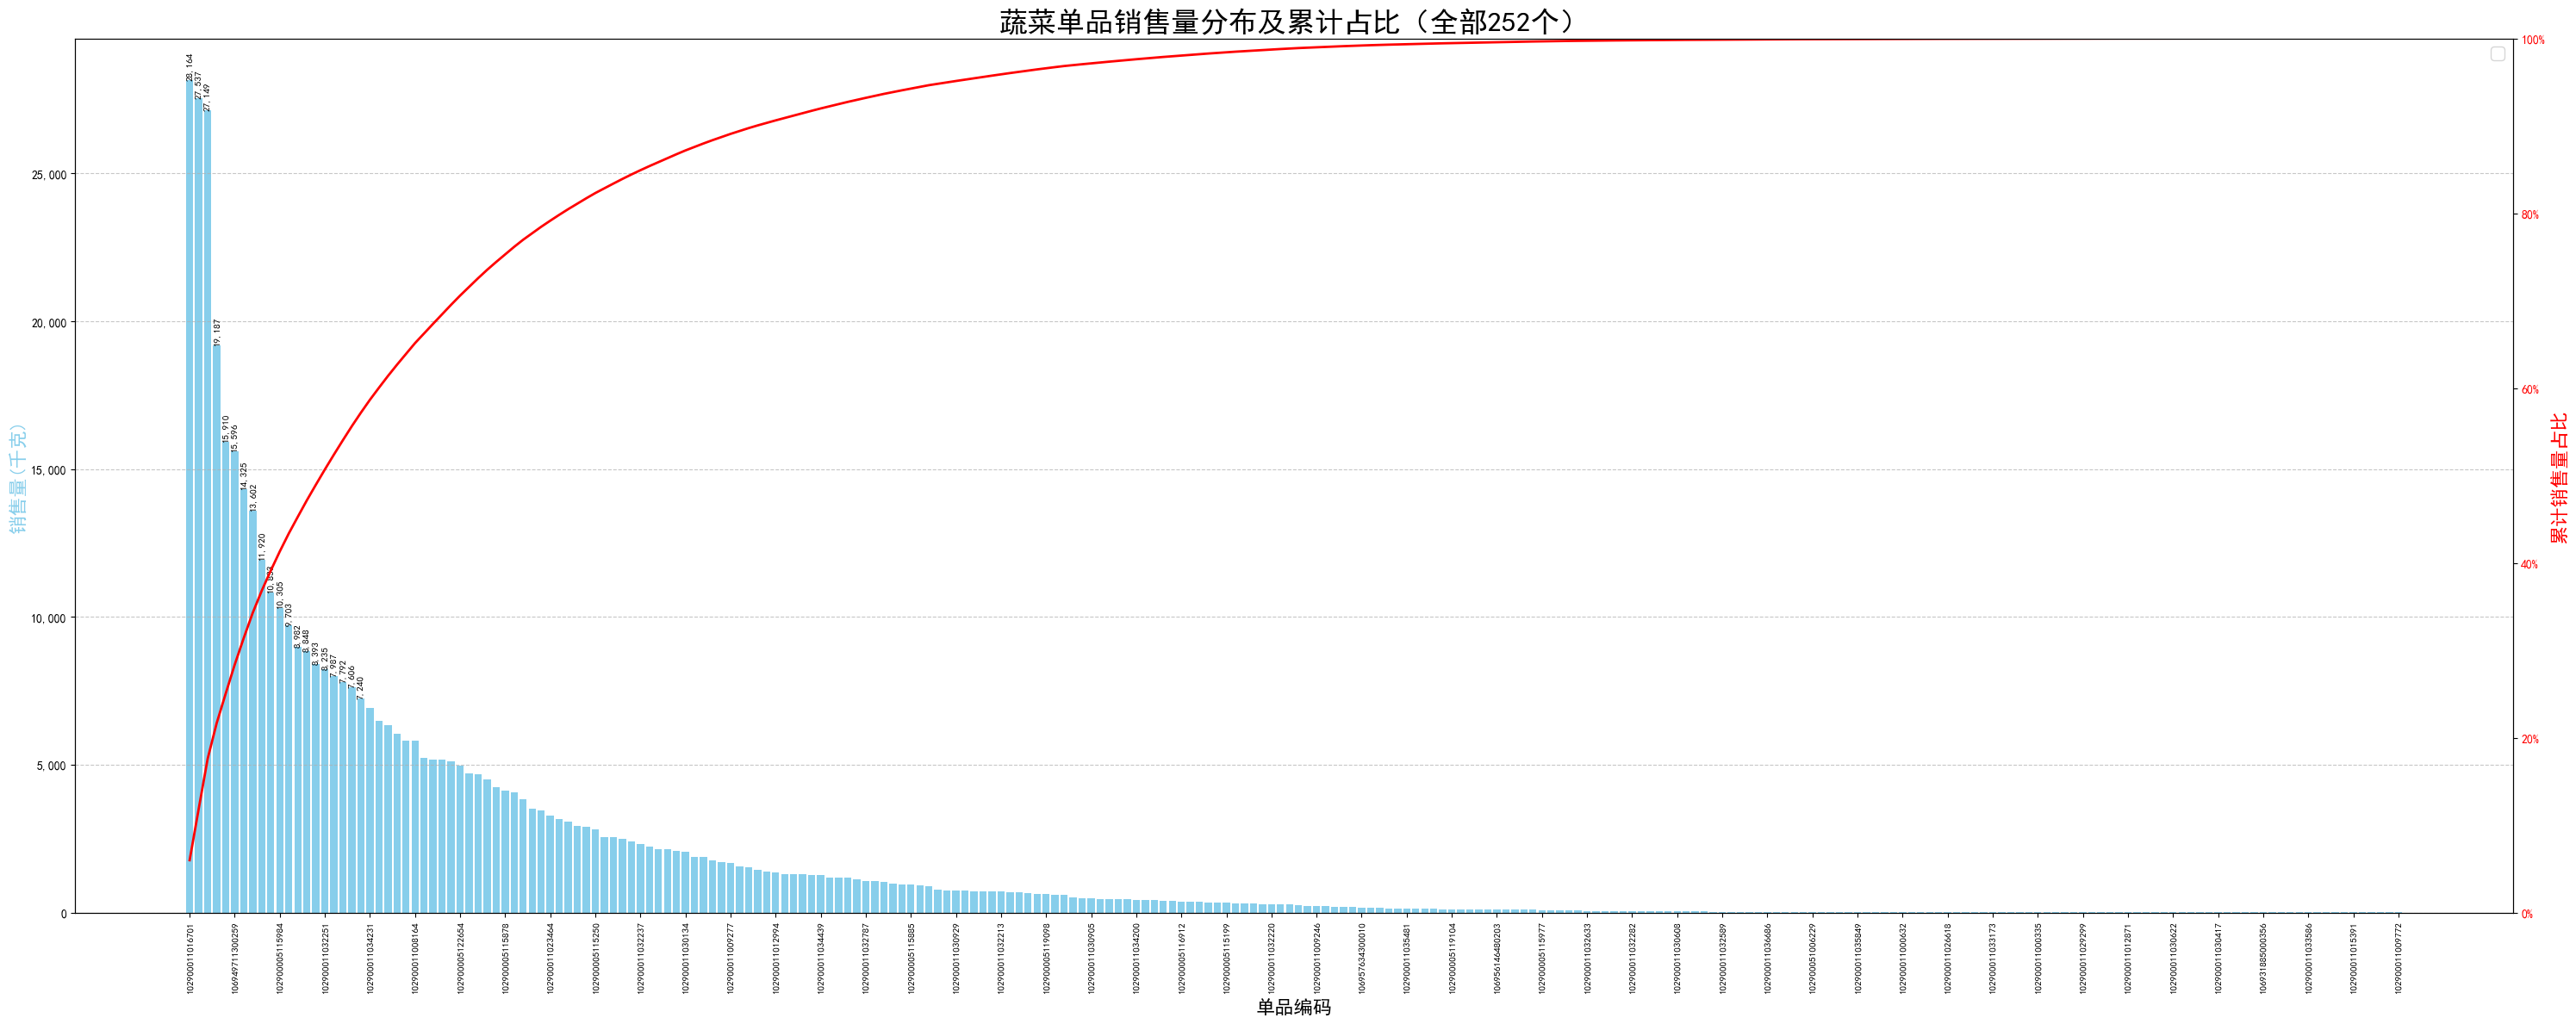

销量最大的前10个单品：
           单品编码    销量(千克)  累计销售量占比
102900011016701 28164.331 0.059800
102900005116714 27537.228 0.118268
102900005116899 27149.440 0.175913
102900005115960 19187.218 0.216653
102900005115779 15910.461 0.250435
106949711300259 15596.000 0.283549
102900011030059 14325.000 0.313964
102900005116257 13602.001 0.342845
102900005116530 11920.227 0.368155
102900011031100 10833.000 0.391156

长尾效应分析：
前20%的单品（49个）占总销量的 83.91%
前50%的单品（123个）占总销量的 98.84%


In [4]:
#########################################  单品销售额分布 ############
# 按销售量降序排序
df_result1_sorted = df_result1.sort_values('销量(千克)', ascending=False)

# 计算累计销售量占比
df_result1_sorted['累计销售量占比'] = df_result1_sorted['销量(千克)'].cumsum() / df_result1_sorted['销量(千克)'].sum()

# 绘制单品销售量分布图（所有252个）
fig, ax1 = plt.subplots(figsize=(30, 12))  # 增加图表宽度

# 创建均匀间隔的 x 轴
x = np.arange(246)

# 绘制柱状图
bars = ax1.bar(x, df_result1_sorted['销量(千克)'], color='skyblue', width=0.8)

# 添加标题和轴标签
ax1.set_title('蔬菜单品销售量分布及累计占比（全部252个）', fontsize=24)
ax1.set_xlabel('单品编码', fontsize=16)
ax1.set_ylabel('销售量(千克)', fontsize=16, color='skyblue')

# 设置 x 轴刻度和标签
ax1.set_xticks(x[::5])  # 每5个显示一个标签
ax1.set_xticklabels(df_result1_sorted['单品编码'][::5], rotation=90, ha='center', fontsize=8)

# 格式化 y 轴，添加千位分隔符
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 添加数据标签（只为前20个添加标签以避免过于拥挤）
for bar in bars[:20]:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=8, rotation=90)

# 添加网格线
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 添加累计销售量占比的折线图
ax2 = ax1.twinx()
ax2.plot(x, df_result1_sorted['累计销售量占比'], color='red', marker='', linestyle='-', linewidth=2)
ax2.set_ylabel('累计销售量占比', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['销售量', '累计占比'], loc='upper right', fontsize=14)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

# 打印前10个销量最大的单品
print("销量最大的前10个单品：")
print(df_result1_sorted[['单品编码', '销量(千克)', '累计销售量占比']].head(10).to_string(index=False))

# 打印长尾效应
print("\n长尾效应分析：")
print(f"前20%的单品（{len(df_result1_sorted)//5}个）占总销量的 {df_result1_sorted['累计销售量占比'].iloc[len(df_result1_sorted)//5-1]:.2%}")
print(f"前50%的单品（{len(df_result1_sorted)//2}个）占总销量的 {df_result1_sorted['累计销售量占比'].iloc[len(df_result1_sorted)//2-1]:.2%}")


In [5]:

# #####################################################合并单品和品类数据#########################
# 计算相关系数
correlation = stats.pearsonr(df_category_analysis['单品数量'], df_category_analysis['销量(千克)'])
print(f"单品数量和销售量的相关系数: {correlation[0]:.2f}, p-value: {correlation[1]:.4f}")

# 改进的散点图
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_category_analysis, x='单品数量', y='销量(千克)', 
                size='平均单品销售量', sizes=(20, 500), alpha=0.6)
plt.title('品类 销售量 vs 单品数量 (气泡大小表示平均单品销售量)')
plt.xlabel('单品数量')
plt.ylabel('销量(千克)')

# 添加趋势线
sns.regplot(data=df_category_analysis, x='单品数量', y='销量(千克)', 
            scatter=False, color='red')

# 为top 5的品类添加标签
for i in range(5):
    row = df_category_analysis_sorted.iloc[i]
    plt.annotate(row['分类编码'], (row['单品数量'], row['销量(千克)']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# 条形图：top 10品类的平均单品销售量
plt.figure(figsize=(14, 8))
sns.barplot(data=df_category_analysis_sorted.head(10), x='分类编码', y='平均单品销售量')
plt.title('Top 10 品类的平均单品销售量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 饼图：销售量占比
plt.figure(figsize=(12, 12))
plt.pie(df_category_analysis['销量(千克)'], labels=df_category_analysis['分类编码'], autopct='%1.1f%%')
plt.title('各品类销售量占比')
plt.axis('equal')
plt.tight_layout()
plt.show()


NameError: name 'stats' is not defined

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import seaborn as sns



# 获取当前脚本所在目录的绝对路径
current_path = os.path.dirname(__file__)

# 构建附件1.xlsx和附件4.xlsx的相对路径
path_file1 = os.path.join(current_path, '附件1.xlsx')
path_file2 = os.path.join(current_path,'附件2.xlsx')

# 打印路径以进行调试
print(path_file1)
print(path_file2)
# 读取附件1.xlsx
df1 = pd.read_excel(path_file1)
# 读取附件2.xlsx
df2 = pd.read_excel(path_file2)

# 打印数据框的前几行，查看数据
print(df1.head())
print(df2.head())

#df_merge是全数据，df_result1是单品数据，df_result2是分类数据
df_merge = pd.merge(df1,df2,on='单品编码',how='inner')
df_merge['总销售额']=df_merge['销量(千克)']*df_merge['销售单价(元/千克)']
df_result1 = df_merge.groupby('单品编码').agg({'销量(千克)':'sum','总销售额':'sum'}).reset_index()
df_result2 = df_merge.groupby('分类编码').agg({'销量(千克)':'sum','总销售额':'sum'}).reset_index()
df_result1
df_merge

df_result2["单品数量"] = df1.groupby('分类编码').agg({'单品编码':'count'}).reset_index()['单品编码']
df_result2["平均单品销售量"] = df_result2['总销售额'] / df_result2['单品数量']
df_result2